In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline

In [ ]:
# 2 out of 6 questions completed (1, 3, 4, 5, and 6 are good)

In [3]:
europe_df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

europe_df.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0
10,CH,55.0,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0


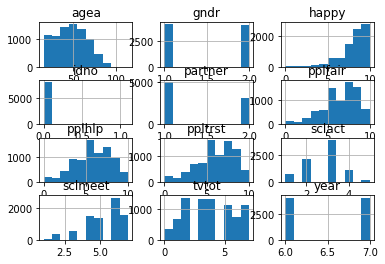

In [4]:
europe_df.hist()
plt.show()

In [5]:
print(len(europe_df))

8147


# 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

The t-test for paired samples will be utilized because the comparison is between two years where all participants experienced both versions.

In [6]:
europe_df_2012 = europe_df.loc[europe_df['year'] == 6]
europe_df_2012 = europe_df_2012.groupby(europe_df_2012['cntry'])['ppltrst'].mean()
print(europe_df_2012)

print(stats.kstest(europe_df_2012, 'norm'))
europe_df_2014 = europe_df.loc[europe_df['year'] == 7]
europe_df_2014 = europe_df_2014.groupby(europe_df_2014['cntry'])['ppltrst'].mean()
print(europe_df_2014)
print(stats.kstest(europe_df_2014, 'norm'))

cntry
CH    5.685792
CZ    4.402662
DE    5.076923
ES    5.127807
NO    6.648305
SE    6.043073
Name: ppltrst, dtype: float64
KstestResult(statistic=0.9999946534712008, pvalue=4.671554917982289e-32)
cntry
CH    5.764468
CZ    4.356436
DE    5.357143
ES    4.940035
NO    6.599719
SE    6.239908
Name: ppltrst, dtype: float64
KstestResult(statistic=0.999993390123089, pvalue=1.667977655659105e-31)


In [ ]:
# The p-value of approximately 0 here reveals that distribution is unusual, so a wilcoxon must be used.

In [8]:
stats.wilcoxon(europe_df_2012,europe_df_2014)

C:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=7.0, pvalue=0.463071015014588)

The high p-value of approximately 0.46 indicates that the null hypothesis of the two paired samples cannot be denied.

# 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

The t-test for paired samples will be utilized because the comparison is between two years where all participants experienced both versions.

In [9]:
europe_df_2012 = europe_df.loc[europe_df['year'] ==6]
for unique in europe_df_2012.cntry.unique():
    cntry = unique
    europe_df_use = europe_df_2012[europe_df_2012['cntry'] == cntry]
    print(stats.kstest(europe_df_use['happy'].dropna(),'norm'))
    
    
europe_df.happy.dropna()
europe_df_2012 = europe_df.loc[europe_df['year'] == 6]
europe_df_2014 = europe_df.loc[europe_df['year'] == 7]
for unique in europe_df_2012.cntry.unique():
    cntry = unique
    europe_df_use2012 = europe_df_2012[europe_df_2012['cntry'] == cntry]
    for unique2 in europe_df_2014.cntry.unique():
        if unique2 == unique:
            cntry2 = unique2
            europe_df_use2014 = europe_df_2014[europe_df_2014['cntry']==cntry]
            print(cntry, stats.mannwhitneyu(europe_df_use2012['happy'], europe_df_use2014['happy']))

KstestResult(statistic=0.993185621094053, pvalue=0.0)
KstestResult(statistic=0.9656026134761136, pvalue=0.0)
KstestResult(statistic=0.9999683287581669, pvalue=6.451730196491971e-59)
KstestResult(statistic=0.9779247133673337, pvalue=0.0)
KstestResult(statistic=0.9930003844542457, pvalue=0.0)
KstestResult(statistic=0.9928293801988705, pvalue=0.0)
CH MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


There was no change in happiness for the countries where the p-value is bigger than 0.05.

# 3) Who reported watching more TV in 2012, men or women?

In [10]:
europe_df.tvtot.dropna()
europe_df_2012 = europe_df.loc[europe_df['year'] == 6]

for unique in europe_df_2012.gndr.unique():
    gndr = unique
    europe_df_use = europe_df_2012[europe_df_2012['gndr'] == gndr]
    print(stats.kstest(europe_df_use['tvtot'].dropna(),'norm'))
    
men = europe_df_2012[europe_df_2012['gndr'] == 1]
women = europe_df_2012[europe_df_2012['gndr'] == 2]
print(stats.mannwhitneyu(men['tvtot'],women['tvtot'],alternative = 'less'))

KstestResult(statistic=0.8538603735027623, pvalue=0.0)
KstestResult(statistic=0.8564510370727657, pvalue=0.0)
MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


The Mann Whitney U test ranks the tvtot values for the males versus the tvtot values for the females because the males were passed first; and the null hypothesis that men and women watched the same amount of TV cannot be denied because the p-value is so high.

# 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

A t-test for independent samples is utilized because the comparison is between two independent groups.

In [11]:
partnerfair = europe_df.loc[europe_df['year']==6]

print(stats.kstest(partnerfair['pplfair'].dropna(), 'norm'))

# It is not a normal use of mannwhitneyu.
print(stats.mannwhitneyu(partnerfair['partner']==1, partnerfair['partner']==2))

KstestResult(statistic=0.9423690033994012, pvalue=0.0)
MannwhitneyuResult(statistic=6224559.0, pvalue=6.173681213829895e-112)


The low p-value here suggests that the null hypothesis of identical scores can be scrapped and that people living with partners were more likely to view people as fair.

# 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Multiple independent groups with non-normal distribution mean that a median test is required.

In [12]:
scl = europe_df.loc[europe_df['year'] == 7]

CH = scl[scl['cntry']=='CH'].dropna()
CH = CH.sclact
CZ = scl[scl['cntry']=='CZ'].dropna()
CZ = CZ.sclact
DE = scl[scl['cntry']=='DE'].dropna()
DE = DE.sclact

print('CH KStest: ', stats.kstest([CH], 'norm'))
print('CZ KStest: ', stats.kstest([CZ], 'norm'))
print('DE KStest: ', stats.kstest([DE], 'norm'))

print('Median Test: ', stats.median_test(CH,CZ,DE))

CH KStest:  KstestResult(statistic=0.9999997133484281, pvalue=5.733031438470704e-07)
CZ KStest:  KstestResult(statistic=0.9999997133484281, pvalue=5.733031438470704e-07)
DE KStest:  KstestResult(statistic=0.9999683287581669, pvalue=6.334248366623996e-05)
Median Test:  (8.440963041728674, 0.014691568504652792, 3.0, array([[138,  79,   1],
       [605, 527,  13]], dtype=int64))


The p-value is below 0.05, so the null hypothesis can be rejected, and the array lists the number of values above the grand median first and the number of values below the grand median second. The three countries have diverse ratios of under versus over values, with DE having the biggest difference, then CZ having the second biggest difference.

# 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Multiple independent groups means that a median test is needed.

In [13]:
# Must sort by country and then age. After that, a comparison of each country's age group versus another's sclact must be done.

scl = europe_df.loc[europe_df['year']==7]

CH = scl[scl['cntry']=='CH'].dropna()
CZ = scl[scl['cntry']=='CZ'].dropna()
NO = scl[scl['cntry']=='NO'].dropna()

CH_twenty_thirty = CH[CH['agea']<30]
CH_twenty_thirty = CH_twenty_thirty[CH_twenty_thirty['agea']>=20]
CH_twenty_thirty = CH_twenty_thirty.sclact
CZ_twenty_thirty = CZ[CZ['agea']<30]
CZ_twenty_thirty = CZ_twenty_thirty[CZ_twenty_thirty['agea']>=20]
CZ_twenty_thirty = CZ_twenty_thirty.sclact
NO_twenty_thirty = NO[NO['agea']<30]
NO_twenty_thirty = NO_twenty_thirty[NO_twenty_thirty['agea']>=20]
NO_twenty_thirty = NO_twenty_thirty.sclact

print(CH_twenty_thirty.shape, CZ_twenty_thirty.shape, NO_twenty_thirty.shape)

stats.median_test(CH_twenty_thirty, CZ_twenty_thirty, NO_twenty_thirty)

(107,) (95,) (94,)


(0.16104360285522612, 0.9226347886089327, 3.0, array([[16, 15, 16],
        [91, 80, 78]], dtype=int64))

The high p-value here indicates that the null hypothesis of identical medians cannot be denied.